In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
train_df = pd.read_csv('../data/interim/train.csv')

In [77]:
target = train_df['SalePrice']
cat_features = train_df.select_dtypes(include='object')
num_features = train_df.select_dtypes(exclude='object')

In [108]:
cat_features.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# Univariate analysis

In [5]:
# See some stats of our target variable (SalesPrice)

target.describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

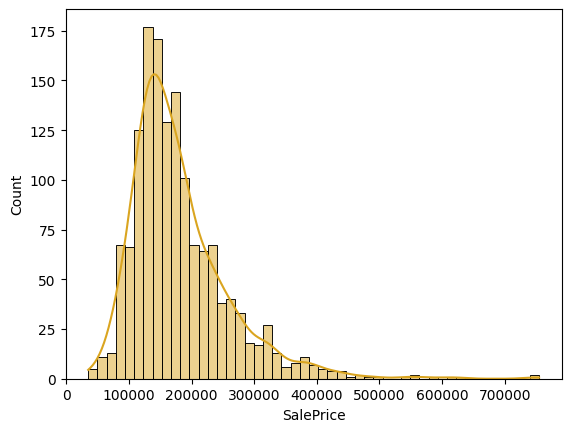

In [6]:

sns.histplot(
    data=target,
    kde=True,
    color='goldenrod'
)

In [7]:
print(f"Skewness: {round(target.skew(), 4)}")
print(f'Kurtosis: {round(target.kurt(), 4)}')

Skewness: 1.8831
Kurtosis: 6.573


<Axes: ylabel='SalePrice'>

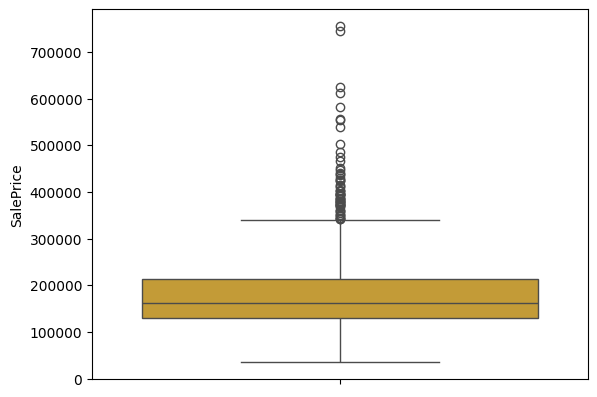

In [8]:
sns.boxplot(
    data=target,
    color='goldenrod'
)

# Bivariate Analysis

Let see the correlation between the variables

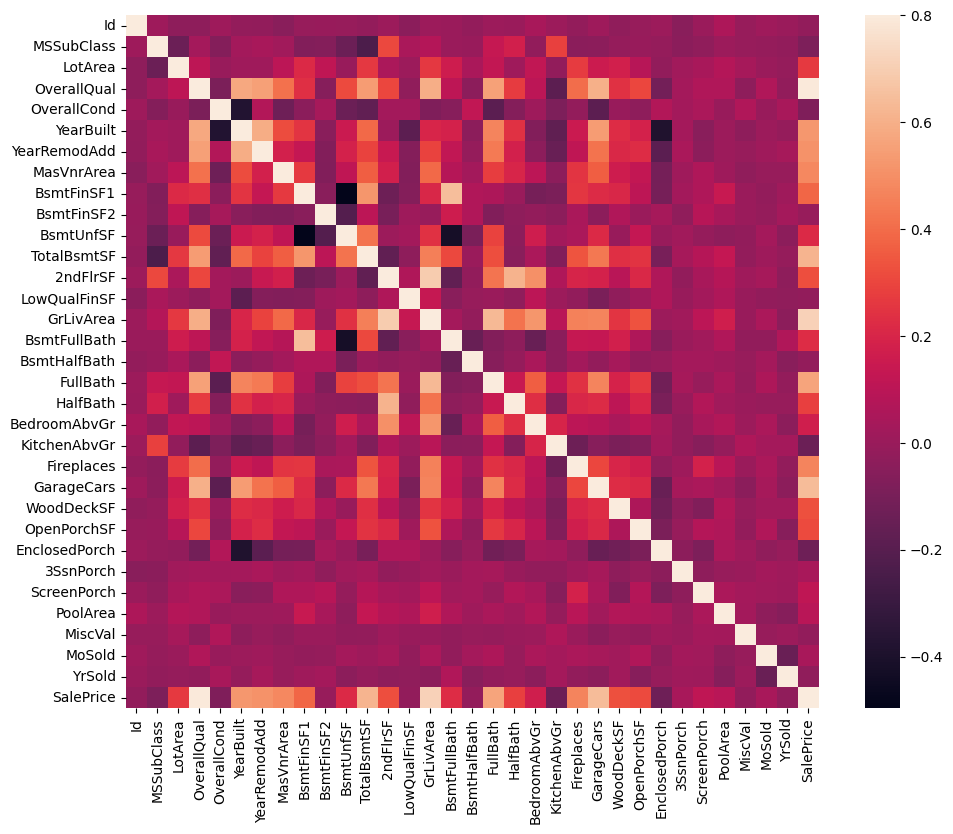

In [9]:
corrmat = train_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

As we can see, there is a lot of features that has strong correlation with the sale price

In [10]:
train_df.corr(numeric_only=True)['SalePrice'].apply(lambda x: -1 * x if x < 0 else x).sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790085
GrLivArea       0.710073
GarageCars      0.639749
TotalBsmtSF     0.613299
FullBath        0.562710
YearBuilt       0.523274
YearRemodAdd    0.507488
MasVnrArea      0.477486
Fireplaces      0.468973
BsmtFinSF1      0.383995
WoodDeckSF      0.324658
2ndFlrSF        0.322840
OpenPorchSF     0.311244
HalfBath        0.282331
Name: SalePrice, dtype: float64

In [11]:
train_df.corr(numeric_only=True)['SalePrice'].sort_values().head(15)

KitchenAbvGr    -0.137447
EnclosedPorch   -0.128826
MSSubClass      -0.082760
OverallCond     -0.076361
YrSold          -0.026165
LowQualFinSF    -0.025277
Id              -0.025188
MiscVal         -0.020961
BsmtHalfBath    -0.016021
BsmtFinSF2      -0.010350
MoSold           0.045085
3SsnPorch        0.045235
PoolArea         0.093102
ScreenPorch      0.113017
BedroomAbvGr     0.171956
Name: SalePrice, dtype: float64

Let's analyse some features.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

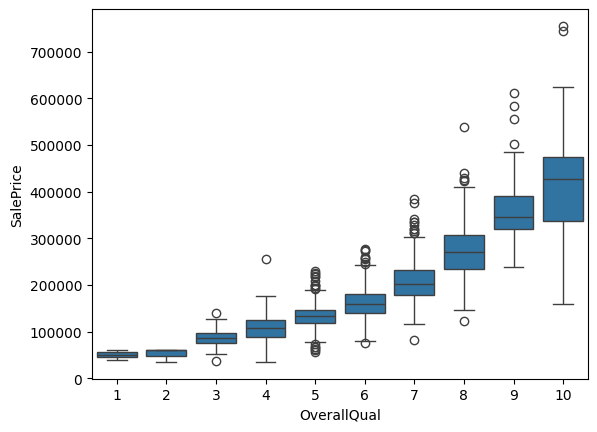

In [12]:
sns.boxplot(
    data=train_df,
    x='OverallQual',
    y='SalePrice'
)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

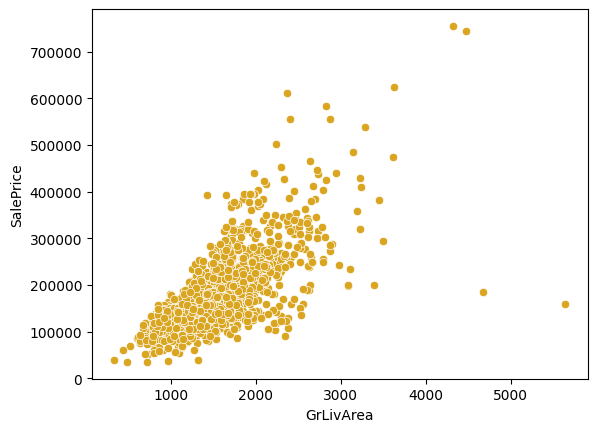

In [13]:
sns.scatterplot(
    data=train_df,
    x='GrLivArea',
    y='SalePrice',
    color='goldenrod'
)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

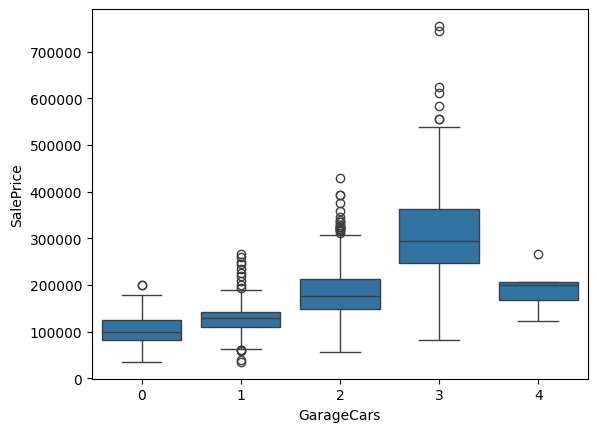

In [14]:
sns.boxplot(
    data=train_df,
    x='GarageCars',
    y='SalePrice'
)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

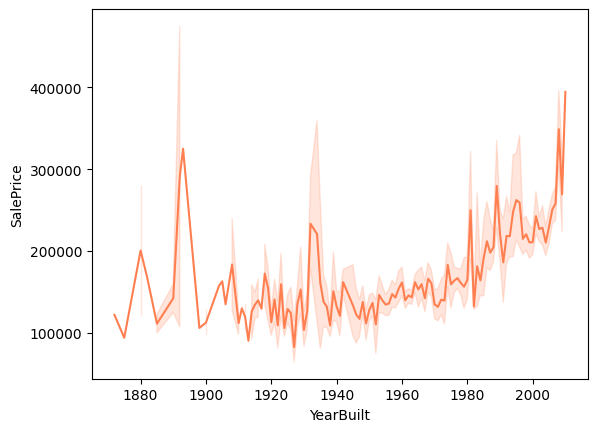

In [15]:

sns.lineplot(
    data=train_df,
    x='YearBuilt',
    y='SalePrice',
    color='coral',
)



In [17]:
corrmat = train_df.corr(numeric_only=True)

In [18]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces'],
      dtype='object')

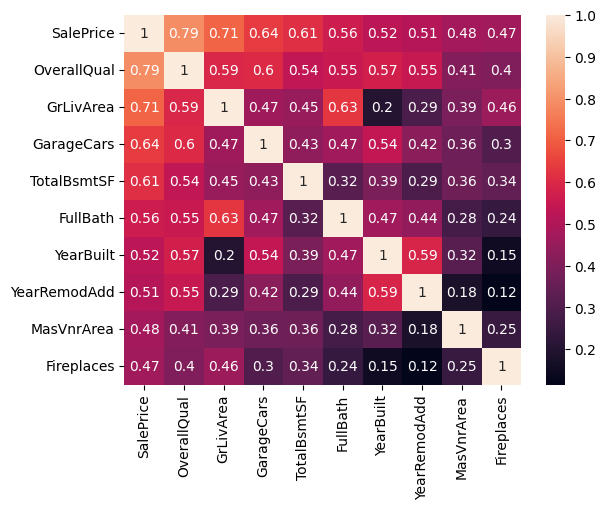

In [19]:
sns.heatmap(train_df[cols].corr(), annot=True)
plt.savefig('../reports/figures/heatmap10corr')

/home/johan/miniconda3/envs/houses_price/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


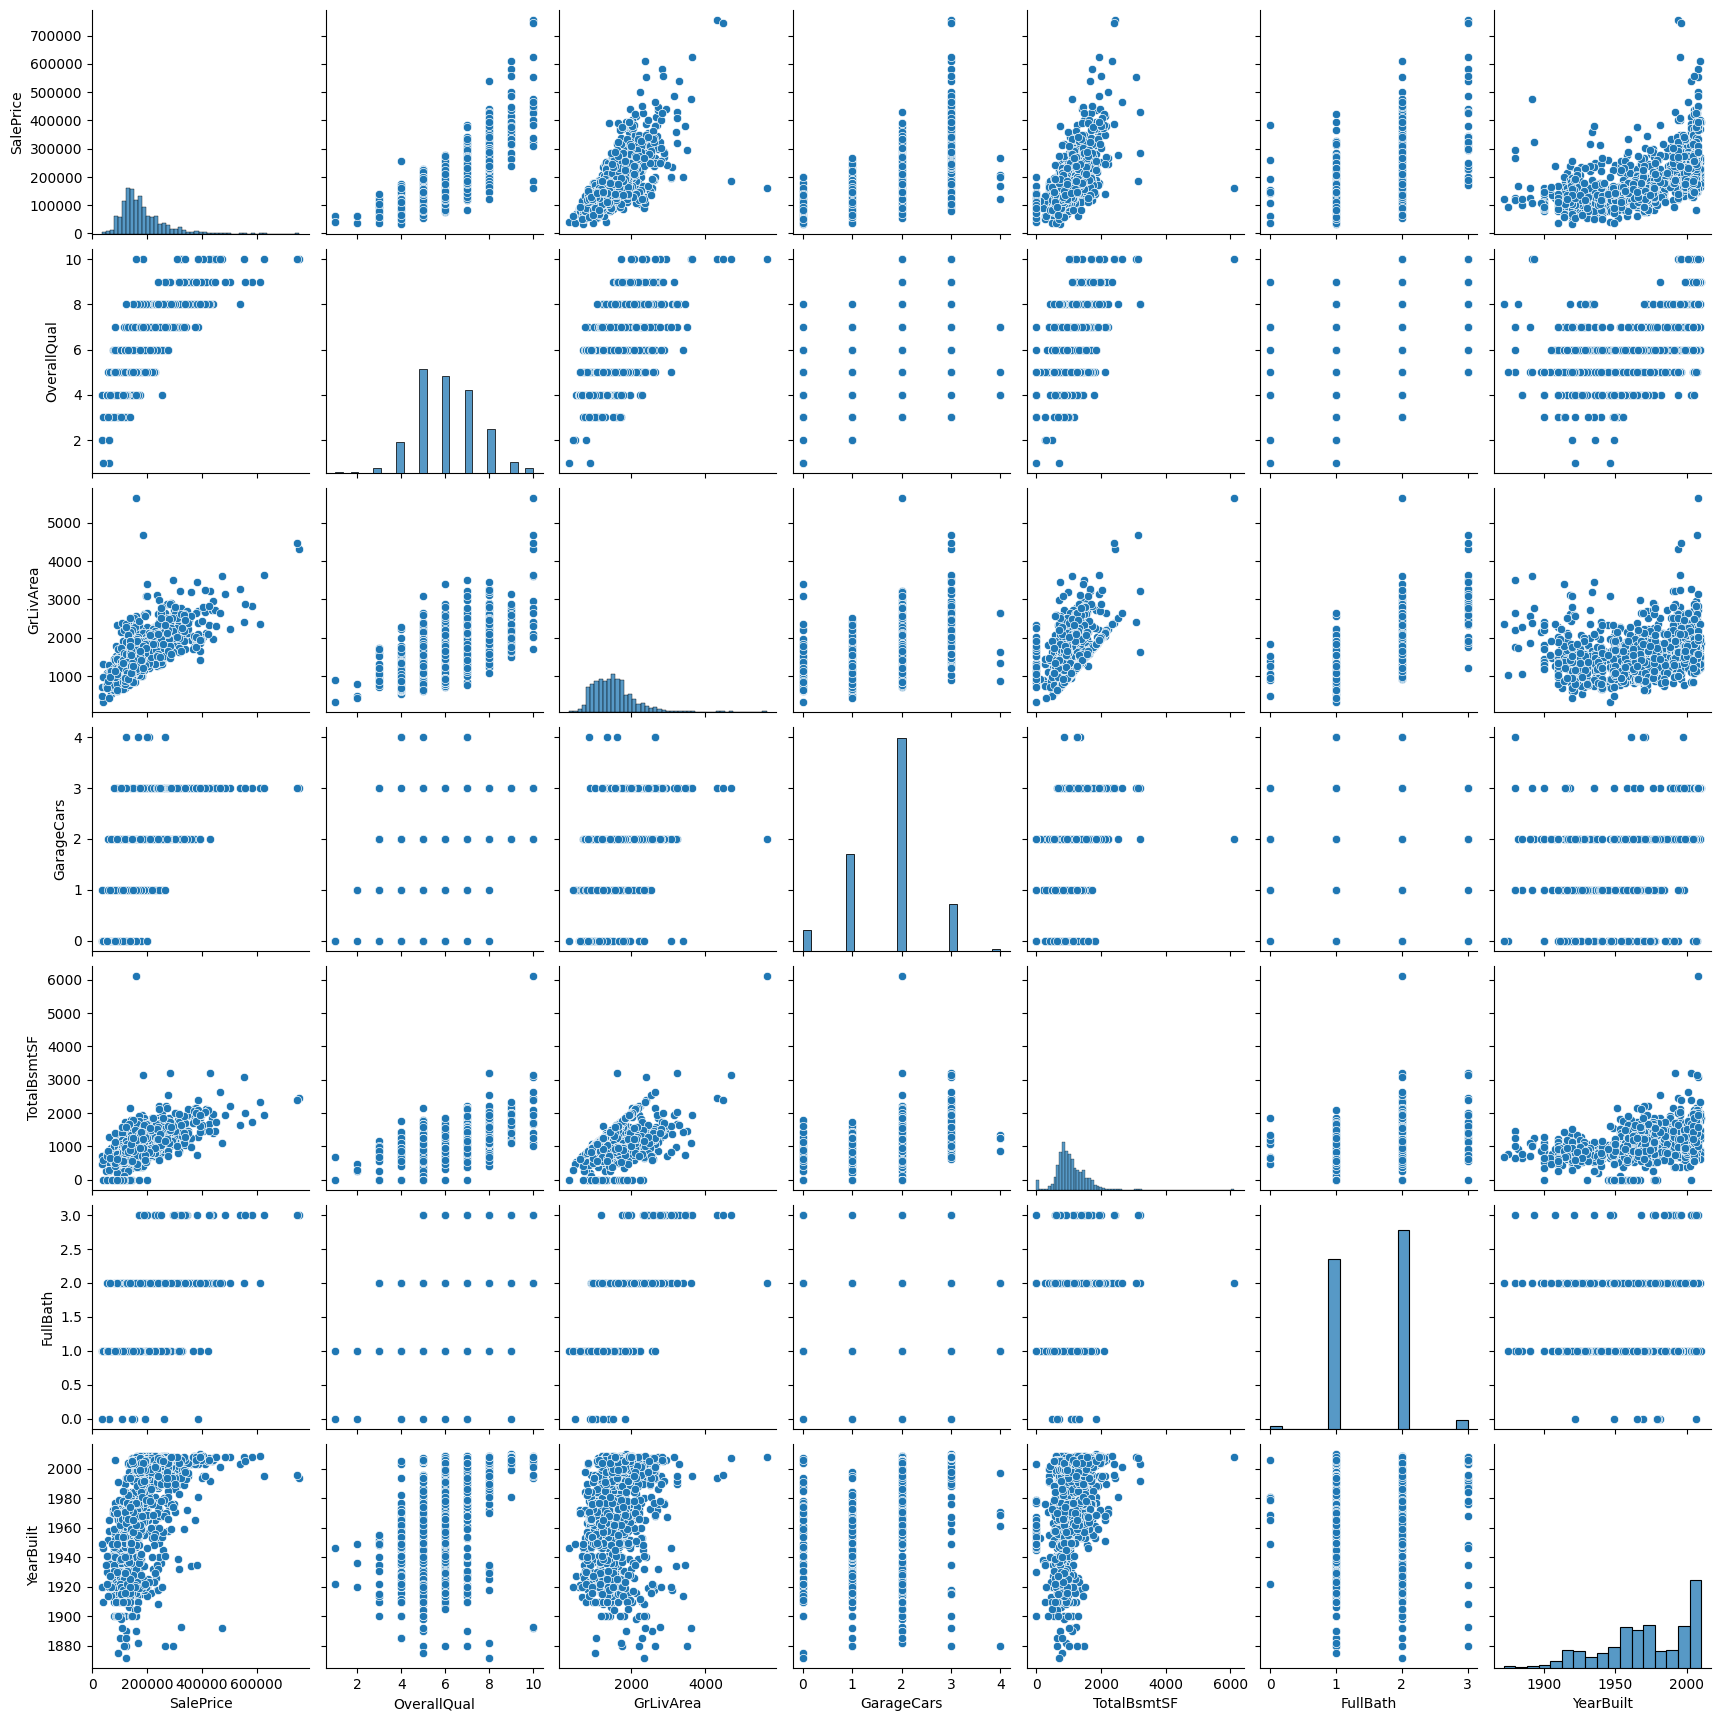

In [20]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(train_df[cols], size=2.5)

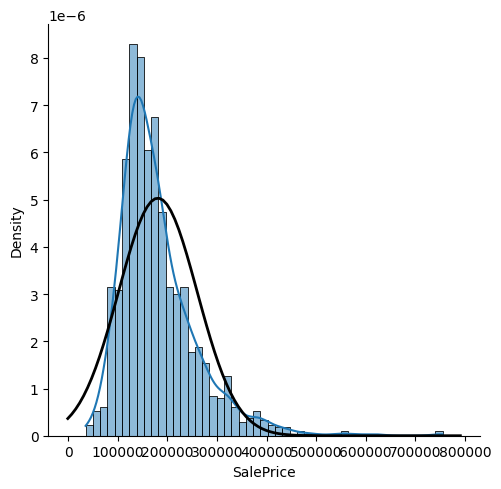

<Figure size 640x480 with 0 Axes>

In [21]:
from scipy.stats import norm



mu, std = norm.fit(train_df['SalePrice'])

sns.displot(
    data=train_df['SalePrice'],
    kde=True,
    stat='density'
)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()
plt.savefig('../reports/figures/normdistvsrealdis')

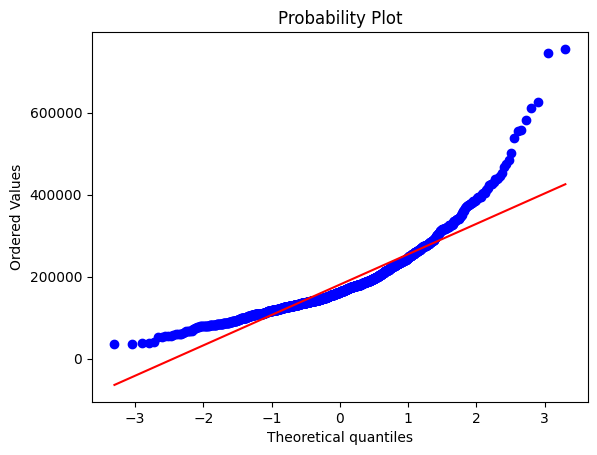

In [22]:
from scipy import stats
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.savefig('../reports/figures/probplot')

### Normalization

In [23]:
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])

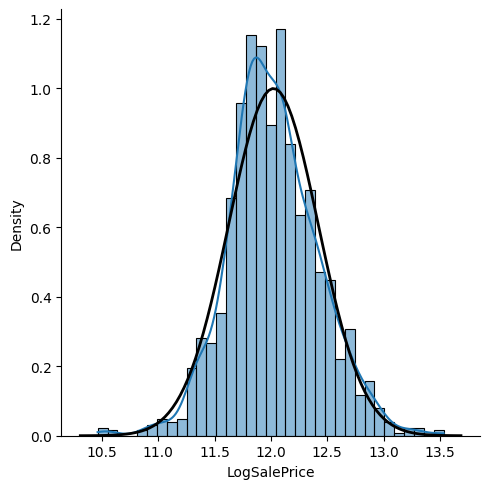

In [24]:
mu, std = norm.fit(train_df['LogSalePrice'])

sns.displot(
    data=train_df['LogSalePrice'],
    kde=True,
    stat='density'
)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [75]:
train_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1447,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1448,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1449,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Outliers

In [119]:
skewed_feats = num_features.skew()
skewed_feats = skewed_feats[skewed_feats > 0.5]

skewed_feats = skewed_feats.sort_values(ascending=False).drop('SalePrice')
skewed_feats

MiscVal          24.401513
PoolArea         14.782069
LotArea          12.235742
3SsnPorch        10.271742
LowQualFinSF      8.982567
KitchenAbvGr      4.512817
BsmtFinSF2        4.240230
ScreenPorch       4.107411
BsmtHalfBath      4.088583
EnclosedPorch     3.094001
MasVnrArea        2.668016
OpenPorchSF       2.384908
BsmtFinSF1        1.702582
WoodDeckSF        1.541872
TotalBsmtSF       1.535566
MSSubClass        1.408299
GrLivArea         1.373512
BsmtUnfSF         0.919977
2ndFlrSF          0.815766
OverallCond       0.693905
HalfBath          0.685128
Fireplaces        0.647744
BsmtFullBath      0.604189
dtype: float64

In [80]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(func=np.log1p, validate=True)

train_df[skewed_feats] = log_transformer.fit_transform(train_df[skewed_feats])

# Scaling

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_feat = num_features.drop(['Id', 'SalePrice'], axis=1).columns

train_df[num_feat] = scaler.fit_transform(train_df[num_feat])

In [107]:
num_features.drop(['Id', 'SalePrice'], axis=1).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

# Cat into num

In [86]:
final_df = pd.get_dummies(train_df).reset_index(drop=True)

In [92]:
final_df = final_df.drop(columns=['Id'])

In [122]:
final_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.483003,0.366271,0.666667,0.682606,0.949275,0.883333,0.716038,0.759508,0.000000,0.646838,...,False,False,False,True,False,False,False,False,True,False
1,0.000000,0.391245,0.555556,0.934536,0.753623,0.433333,0.000000,0.797188,0.000000,0.728731,...,False,False,False,True,False,False,False,False,True,False
2,0.483003,0.422289,0.666667,0.682606,0.934783,0.866667,0.690361,0.716357,0.000000,0.783246,...,False,False,False,True,False,False,False,False,True,False
3,0.551764,0.390223,0.666667,0.682606,0.311594,0.333333,0.000000,0.622780,0.000000,0.811361,...,False,False,False,True,True,False,False,False,False,False
4,0.483003,0.468694,0.777778,0.682606,0.927536,0.833333,0.794318,0.750841,0.000000,0.798858,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,0.483003,0.353519,0.555556,0.682606,0.920290,0.833333,0.000000,0.000000,0.000000,0.884491,...,False,False,False,True,False,False,False,False,True,False
1447,0.000000,0.453205,0.555556,0.778385,0.768116,0.633333,0.648854,0.772504,0.698955,0.822539,...,False,False,False,True,False,False,False,False,True,False
1448,0.551764,0.379525,0.666667,1.000000,0.500000,0.933333,0.000000,0.650620,0.000000,0.873788,...,False,False,False,True,False,False,False,False,True,False
1449,0.000000,0.393616,0.444444,0.778385,0.565217,0.766667,0.000000,0.452858,0.950784,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [94]:
X_train = final_df.drop('SalePrice', axis=1)
y_train = final_df['SalePrice']

In [97]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [98]:
feat_selection = SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))
feat_selection.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [101]:
selected_features = X_train.columns[(feat_selection.get_support())]

In [102]:
selected_features

Index(['OverallQual', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg',
       'Neighborhood_Edwards', 'Condition1_Norm', 'BldgType_1Fam',
       'RoofStyle_Gable', 'ExterQual_TA', 'Foundation_PConc', 'HeatingQC_Ex',
       'CentralAir_N', 'KitchenQual_Ex', 'KitchenQual_TA', 'Functional_Typ',
       'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Abnorml'],
      dtype='object')

In [103]:
X_train = X_train[selected_features]

In [104]:
X_train[]

,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,GrLivArea,BsmtFullBath,FullBath,Fireplaces,GarageCars,WoodDeckSF,...,ExterQual_TA,Foundation_PConc,HeatingQC_Ex,CentralAir_N,KitchenQual_Ex,KitchenQual_TA,Functional_Typ,PavedDrive_Y,SaleType_New,SaleCondition_Abnorml
0,0.666667,0.883333,0.716038,0.759508,0.577436,0.5,0.666667,0.000000,0.50,0.000000,...,False,True,True,False,False,False,True,True,False,False
1,0.555556,0.433333,0.000000,0.797188,0.469935,0.0,0.666667,0.500000,0.50,0.843935,...,True,False,True,False,False,True,True,True,False,False
2,0.666667,0.866667,0.690361,0.716357,0.592825,0.5,0.666667,0.500000,0.50,0.000000,...,False,True,True,False,False,False,True,True,False,False
3,0.666667,0.333333,0.000000,0.622780,0.578882,0.5,0.333333,0.500000,0.75,0.000000,...,True,False,False,False,False,False,True,True,False,True
4,0.777778,0.833333,0.794318,0.750841,0.666289,0.5,0.666667,0.500000,0.75,0.779126,...,False,True,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,0.555556,0.833333,0.000000,0.000000,0.564152,0.0,0.666667,0.500000,0.50,0.000000,...,True,True,True,False,False,True,True,True,False,False
1447,0.555556,0.633333,0.648854,0.772504,0.645566,0.5,0.666667,0.792481,0.50,0.867250,...,True,False,False,False,False,True,False,True,False,False
1448,0.666667,0.933333,0.000000,0.650620,0.688447,0.0,0.666667,0.792481,0.25,0.000000,...,False,False,True,False,False,False,True,True,False,False
1449,0.444444,0.766667,0.000000,0.452858,0.414179,0.5,0.333333,0.000000,0.25,0.874272,...,True,False,False,False,False,False,True,True,False,False


In [124]:
transformed = pd.read_csv('../data/interim/transformed_test.csv')
transformed

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.428656,0.444444,0.625,0.644928,0.183333,0.000000,0.711997,0.682079,0.722237,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.468791,0.555556,0.625,0.623188,0.133333,0.635823,0.790495,0.000000,0.774669,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.483003,0.462701,0.444444,0.500,0.905797,0.800000,0.000000,0.772651,0.000000,0.635232,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.483003,0.398804,0.555556,0.625,0.913043,0.800000,0.412627,0.741089,0.000000,0.745663,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.793236,0.263769,0.777778,0.500,0.869565,0.700000,0.000000,0.645475,0.000000,0.892862,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0.922605,0.077909,0.333333,0.750,0.710145,0.333333,0.000000,0.000000,0.000000,0.812783,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1440,0.922605,0.073617,0.333333,0.500,0.710145,0.333333,0.000000,0.640548,0.000000,0.733177,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1441,0.000000,0.534906,0.444444,0.750,0.637681,0.766667,0.000000,0.823138,0.000000,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1442,0.638580,0.407682,0.444444,0.500,0.869565,0.700000,0.000000,0.674079,0.000000,0.819443,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
